Non ML model testing the percentage of capital letters in a news post title.

# Imports and Constants

In [1]:
import pandas as pd
import numpy as np
import ast
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.metrics import ConfusionMatrixDisplay

In [2]:
DATA_PATH = '../data/'
PRE_PROCESSED_DATA_FILE_NAME = 'news_dataset_pre_processed.csv'
RANDOM_STATE = 42

# Load Data

In [3]:
df = pd.read_csv(DATA_PATH + PRE_PROCESSED_DATA_FILE_NAME, low_memory=False)

In [4]:
df.head()

,title,text,subject,date,label,title_len,text_len,caps_in_title,norm_caps_in_title,caps_in_text,norm_caps_in_text,text_tokens,text_urls,clean_text,title_urls,twitter_handles,clean_title,clean_text_tokens,clean_title_tokens
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,2017-12-31,fake,79,2893,11,0.139241,138,0.047701,"['Donald', 'Trump', 'just', 'couldn', 't', 'wi...",['pic.twitter.com/4FPAe2KypA'],donald trump just couldn t wish all americans ...,[],"['@realDonaldTrump', '@TalbertSwan', '@calvins...",donald trump sends out embarrassing new year’s...,"['donald', 'trump', 'just', 'couldn', 'wish', ...","['donald', 'trump', 'sends', 'out', 'embarrass..."
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,2017-12-31,fake,69,1898,8,0.115942,88,0.046365,"['House', 'Intelligence', 'Committee', 'Chairm...",[],house intelligence committee chairman devin nu...,[],[],drunk bragging trump staffer started russian c...,"['house', 'intelligence', 'committee', 'chairm...","['drunk', 'bragging', 'trump', 'staffer', 'sta..."
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,2017-12-30,fake,90,3597,15,0.166667,308,0.085627,"['On', 'Friday', 'it', 'was', 'revealed', 'tha...","['pic.twitter.com/XtZW5PdU2b', 'pic.twitter.co...","on friday, it was revealed that former milwauk...",[],"['@SheriffClarke', '@SheriffClarke', '@KeithLe...",sheriff david clarke becomes an internet joke ...,"['on', 'it', 'was', 'revealed', 'that', 'forme...","['sheriff', 'david', 'clarke', 'becomes', 'an'..."
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,2017-12-29,fake,78,2774,19,0.243590,123,0.044340,"['On', 'Christmas', 'day', 'Donald', 'Trump', ...","['https://t.co/Fg7VacxRtJ', 'pic.twitter.com/5...","on christmas day, donald trump announced that ...",[],"['@pbump', '@_cingraham', '@_cingraham', '@_ci...",trump is so obsessed he even has obama’s name ...,"['on', 'christmas', 'day', 'donald', 'trump', ...","['trump', 'is', 'so', 'obsessed', 'he', 'even'..."
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,2017-12-25,fake,70,2346,11,0.157143,63,0.026854,"['Pope', 'Francis', 'used', 'his', 'annual', '...",[],pope francis used his annual christmas day mes...,[],[],pope francis just called out donald trump duri...,"['pope', 'francis', 'used', 'his', 'annual', '...","['pope', 'francis', 'just', 'called', 'out', '..."


## convert list of strings represented as a string to a list of strings

In [5]:
df.clean_text_tokens = df.clean_text_tokens.map(ast.literal_eval)
df.clean_title_tokens = df.clean_title_tokens.map(ast.literal_eval)

# Split Data

In [6]:
X_train, X_test, y_train, y_test = train_test_split(df[['title', 'norm_caps_in_title']], 
                                                    df['label'],
                                                   test_size = 0.2,
                                                   random_state = RANDOM_STATE,
                                                   stratify = df['label'])

In [7]:
X_train.shape

(30910, 2)

In [8]:
X_test.shape

(7728, 2)

# Encode Labels

In [9]:
le = LabelEncoder()

In [10]:
y_train_enc = le.fit_transform(y_train)

In [11]:
y_test_enc = le.transform(y_test)

# Test Training Set

Test training set on prediction of True news has < 0.13% capital letters in the title of a news story and a Fake News story will have 0.13% or more.

In [12]:
BREAK_POINT = 0.13

In [13]:
def predict_news(percent_capitals, percentage_break_point):
    """Return a classification for a news story."""
    if percent_capitals >= percentage_break_point:
        return 0
    else:
        return 1

In [14]:
y_train_enc_hat = X_train['norm_caps_in_title'].apply(lambda x: predict_news(x, BREAK_POINT))

In [15]:
print(classification_report(y_train_enc, y_train_enc_hat, target_names=le.classes_))

              precision    recall  f1-score   support

        fake       0.98      0.98      0.98     13957
        true       0.98      0.98      0.98     16953

    accuracy                           0.98     30910
   macro avg       0.98      0.98      0.98     30910
weighted avg       0.98      0.98      0.98     30910



In [16]:
cm = confusion_matrix(y_train_enc, y_train_enc_hat)

In [17]:
matrix = ConfusionMatrixDisplay(confusion_matrix = cm,
                                display_labels = le.classes_)

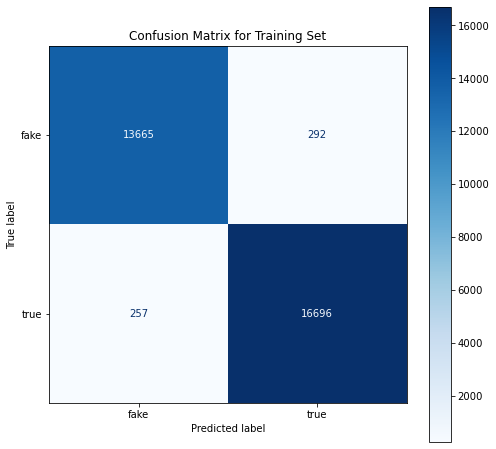

In [18]:
fig, ax = plt.subplots(figsize = (8, 8))
matrix = matrix.plot(include_values = True, 
                     cmap = plt.cm.Blues, 
                     ax = ax, 
                     xticks_rotation = 'horizontal',
                     values_format = 'd')
matrix.ax_.set_title('Confusion Matrix for Training Set')
plt.show()

In [19]:
cm_norm = confusion_matrix(y_train_enc, y_train_enc_hat, normalize='true')
matrix_norm = ConfusionMatrixDisplay(confusion_matrix = cm_norm,
                                     display_labels = le.classes_)

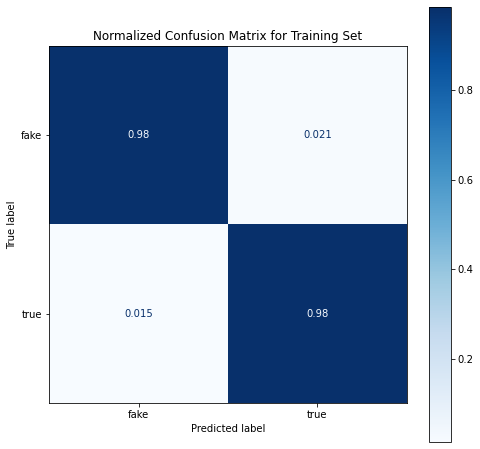

In [20]:
fig, ax = plt.subplots(figsize = (8, 8))
matrix_norm = matrix_norm.plot(include_values = True, 
                               cmap = plt.cm.Blues, 
                               ax = ax, 
                               xticks_rotation = 'horizontal')
matrix_norm.ax_.set_title('Normalized Confusion Matrix for Training Set')
plt.show()

# Review misclassified news stories.

In [21]:
# reindex data
X_train.reset_index(drop=True, inplace=True)
y_train_enc_hat.reset_index(drop=True, inplace=True)
# y_train_enc doesn't need to be reindexed because it already was at train_test_split

In [22]:
df_with_results = pd.concat([X_train, pd.Series(y_train_enc), pd.Series(y_train_enc_hat)], 
                            axis=1, ignore_index=True)

In [23]:
df_with_results.columns = ['title', 'norm_caps_in_title', 'label', 'label_predicted']

In [24]:
df_fake_as_true = df_with_results[(df_with_results.label == 0) & (df_with_results.label_predicted == 1)]

In [25]:
pd.set_option('display.max_colwidth', None)

Look at a sample of Fake News titles that were misclassified as True

In [26]:
df_fake_as_true.head(50)

,title,norm_caps_in_title,label,label_predicted
6,President Obama Arrives in Cuba,0.129032,0,1
11,"51 Companies Are Pledging Over $650 Million In Refugee Support, White House Announces",0.127907,0,1
29,Ben Carson: Homeless Shelters Shouldn’t Be “Comfortable” Because People Might “Stay”,0.129412,0,1
30,Hillary Clinton: “Victory Fund” Gets Massive Cash Injection from Hedge Fund Management (Soros),0.127660,0,1
61,Good News for Silver in 2017,0.107143,0,1
193,Clinton Foundation Didn’t Report $20 Million In Foreign Donations,0.123077,0,1
267,"WATCH OBAMA Admit To Rigged Elections In 2008: “Whenever people are in power, they have this tendency to try to tilt things in their direction.” [Video]",0.111842,0,1
340,"Preparing to Invade: US Deploys Additional 2,500 Soldiers for ‘Syria and Iraq’",0.115385,0,1
588,Philosopher Slavoj Žižek: ‘The American Left Lacks Authenticity’,0.125000,0,1
772,(Video) Colonel Ralph Peters Hammers Obama on Putin and Russian Airstrikes in Syria: “…our president is a deer caught in the headlights of history.”,0.067568,0,1


They mostly follow a standard capitalization format with ones that have some all-capitals words being very long which reduces the % of caps.

Look at a sample of True News titles there were misclassified as Fake

In [27]:
df_true_as_fake = df_with_results[(df_with_results.label == 1) & (df_with_results.label_predicted == 0)]

In [28]:
df_true_as_fake.head(50)

,title,norm_caps_in_title,label,label_predicted
101,"Factbox: Trump on Twitter (Nov. 28) - NFL, First Lady",0.169811,1,0
107,Saudi Crown Prince calls Iran leader 'new Hitler': NYT,0.148148,1,0
176,U.S. Senate backs Montenegro's membership in NATO,0.163265,1,0
221,"U.S.'s Pence, German Foreign Minister agree on NATO's central security role: White House",0.136364,1,0
657,UNESCO selects France's Azoulay as new chief,0.181818,1,0
658,EDF wants to take part in Saudi nuclear plans: CEO,0.140000,1,0
678,Four Russian reporters injured in Syria's Deir al-Zor: RIA,0.137931,1,0
790,The rocky history of NAFTA,0.230769,1,0
791,U.S. President Trump to visit Britain in February: Daily Mail,0.131148,1,0
913,Highlights: The Trump presidency on February 3 at 6:25 P.M. EST/2325 GMT,0.166667,1,0


These titles seem to have a lot of capitalized acronyms.

# Review Correctly Classified Stories

In [30]:
df_true_as_true = df_with_results[(df_with_results.label == 1) & (df_with_results.label_predicted == 1)]

In [31]:
df_true_as_true.head(50)

,title,norm_caps_in_title,label,label_predicted
0,"Magnitude 6.2 quake hits southeast of Oaxaca, Mexico: USGS",0.120690,1,1
1,Defense chief say he has power to set Afghan troop levels,0.035088,1,1
2,Democrats seek probe of Trump donation to Florida attorney general,0.045455,1,1
3,Pennsylvania attorney general resigns following perjury conviction,0.015152,1,1
4,Trump reaches out to lawmakers on healthcare as another says 'no',0.015385,1,1
13,Former Hong Kong student leader escapes jail sentence for campus protest,0.041667,1,1
14,"In Trump travel ban fight, Justice Kennedy's 2015 opinion looms large",0.057971,1,1
16,"Baltimore primary results decertified, irregularities cited",0.016949,1,1
17,The Art of the Deal: Why Putin needs one more than Trump,0.107143,1,1
18,Iran president defends Guards in show of unity anticipating Trump,0.046154,1,1


In [32]:
df_fake_as_fake = df_with_results[(df_with_results.label == 0) & (df_with_results.label_predicted == 0)]

In [33]:
df_fake_as_fake.head(50)

,title,norm_caps_in_title,label,label_predicted
5,"Trump Just Visited His Home State, And New Yorkers Told Him To Get F*cked (IMAGES/VIDEO)",0.280899,0,0
7,"HUGE Spending Agreement Reached: GOP Caves On Sending 10,000 Syrian Refugees",0.197368,0,0
8,OBAMA’S REVEALING LETTER TO BROTHER TELLS WHY BARACK GOT INTO POLITICS,0.842857,0,0
9,BIZARRE WARNING FROM OBAMA Campaign Manager Screams Shadow Government Coup,0.391892,0,0
10,McCain CALLS OUT Trump: Show Us The Evidence!,0.326087,0,0
12,Ted Cruz Holds Hearing On Why Obama Won’t Use The Words He Likes,0.200000,0,0
15,BOMBSHELL: Obama Ensured Uranium Exportation…Ignored National Security Fears [Video],0.214286,0,0
20,Watch Michelle Obama And Conan O’Brien Entertain U.S. Troops In Qatar (VIDEO),0.230769,0,0
21,The Stupid Is Spreading: Now Darrell Issa Doesn’t Think President Obama Is Black (VIDEO),0.202247,0,0
23,"White Men Threw Eggs, Shouted Racial Slurs At Black Woman Waiting For Bus",0.175676,0,0


The Fake news contains lots of all capitals words or most words starting with a capital letter vs. the True news that only capitalize the first letter of the title and proper nouns.

# Summary

Using the percentage of capital letters in the title of the news story provides 98% accuracy and is highly balanced in its miscalculations of about 2% each although the amount of *true* news misclassified as *fake* is slightly lower than vice versa.

I think 98% is an acceptable level of accuracy, however I worry that as a test it is easily beaten by the changing tactics of fake news generators, in a similar way that classifying spam is always changing.

I also worry that this text overfits to this dataset.  There may be more *fake* news like the 2% that is misclassified in the wild and this test would fail.